In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import hardware_control.wx_programs as wx
import hardware_control.bnc as bnc
from classes.generator import *
from hardware_control.hardware_config import *
from experiment_configuration.values import *
from classes.qubit_class import *
import daq.daq_programs_homo as daq
import seaborn as sns
import standard_sequences.pinopi as pnp
import analysis.plotting as plotting

In [2]:
q1 = Qubit(q1_dict, readout_dict)
q2 = Qubit(q2_dict, readout_dict)
# general_vals_dict['TWPA_freq'] = 8.6
# general_vals_dict['TWPA_pwr'] = 1.4
print(f"{q1}\n{q2}")

Qubit(ROIF=0.10275000000000034, ro_amp=1, IQ_angle=205, ge_ssm=-0.1145, ro_dur=4000, qubit_id=q1, qubit_thr=[-10000, -600], ef_time=49.13671850689116, ef_amp=1.5, RO_LO=6.6247, ge_time=81.17534608287957, ge_amp=0.8, ro_freq=6.72745, RO_LO_pwr=16, RO_IF=None, ef_ssm=-0.2568)
Qubit(ROIF=0.030899999999999928, ro_amp=1.5, IQ_angle=85, ge_ssm=-0.154, ro_dur=4000, qubit_id=q2, qubit_thr=[-10000, 1900], ef_time=None, ef_amp=1, RO_LO=6.6247, ge_time=45.047198597262124, ge_amp=0.8, ro_freq=6.6556, RO_LO_pwr=16, RO_IF=None, ef_ssm=-0.2962)


In [3]:
general_vals_dict["wx_offs"] = [0.7, 0, -0.08, 0]

In [4]:
wx_addr = wx.get_wx_address()
main_directory = r"C:\Users\quantum1\Documents"
save_dir = rf"{main_directory}\Python Scripts\Important Blue Fridge Python Files\New\nonlinear_QM\data"
target_bnc_address_6 = "USB0::0x03EB::0xAFFF::411-433500000-0753::INSTR"
bnc.set_bnc_output(
    general_vals_dict["qubit_bnc"], power_dBm=13, bnc_addr=target_bnc_address_6
)
bnc.set_bnc_output(
    readout_dict["RO_LO"],
    power_dBm=readout_dict["RO_LO_pwr"],
    bnc_addr=bnc_address["target_bnc_black"],
)
bnc.set_bnc_output(
    general_vals_dict["TWPA_freq"],
    general_vals_dict["TWPA_pwr"],
    bnc_addr=bnc_address["big_agilent"],
)
num_steps = 3
reps = 20000
swap_freq = -0.0195
swap_time = 0.5 * 6 / abs(swap_freq)  # 152#0.5*7/abs(swap_freq)#193.5253031907684
# q1.ge_amp = 0.4
# q1.ge_time =  81.30534179581487
# q1.ef_time =  46.46542951915684
# q1.ef_amp = 0.8

writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 3
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
0, No error
0, No error
0, No error
0, No error
0, No error
Patterns: 3
Records per pattern: 20000
Buffers per acquistion: 20
DAQ samples per pattern: 8192
0, No error
Capturing 20 buffers. Press <enter> to abort
Capture completed in 8.322918 sec
Captured 20 buffers (2.403003 buffers per sec)
Captured 61440 records (7382.026618 records per sec)
Transferred 1006632960 bytes (120947124.110396 bytes per sec)


<Figure size 800x800 with 0 Axes>

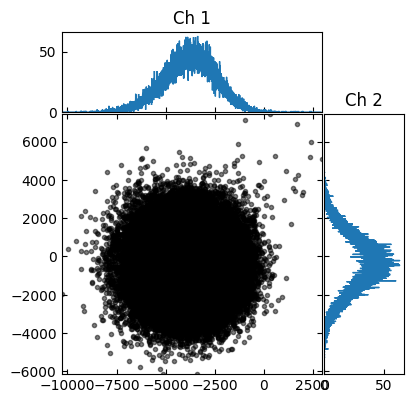

<Figure size 800x800 with 0 Axes>

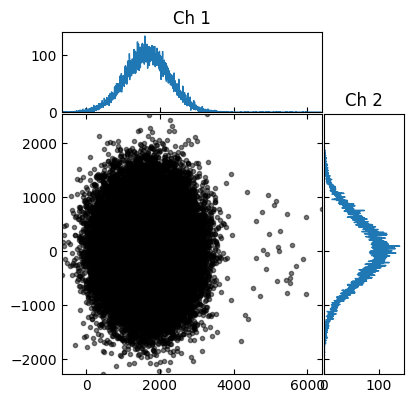

saved G
writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 3
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
0, No error
0, No error
0, No error
0, No error
0, No error
Patterns: 3
Records per pattern: 20000
Buffers per acquistion: 20
DAQ samples per pattern: 8192
0, No error
Capturing 20 buffers. Press <enter> to abort
Capture completed in 8.094722 sec
Captured 20 buffers (2.470746 buffers per sec)
Captured 61440 records (7590.130698 records per sec)
Transferred 1006632960 bytes (124356701.354736 bytes per sec)


<Figure size 800x800 with 0 Axes>

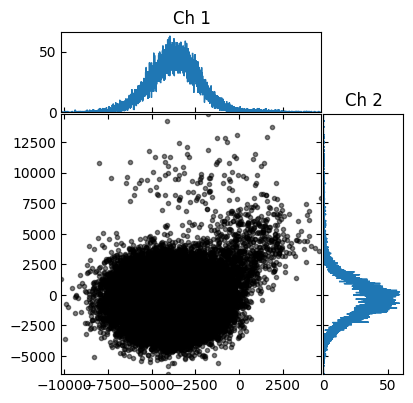

<Figure size 800x800 with 0 Axes>

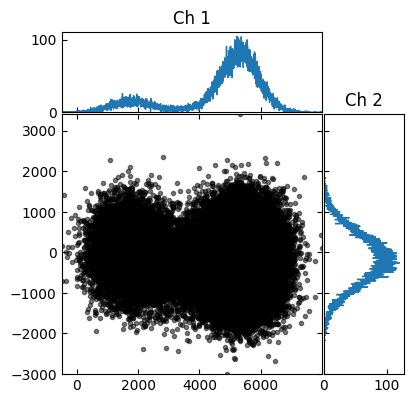

saved E
writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 3
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
0, No error
0, No error
0, No error
0, No error
0, No error
Patterns: 3
Records per pattern: 20000
Buffers per acquistion: 20
DAQ samples per pattern: 8192
0, No error
Capturing 20 buffers. Press <enter> to abort
Capture completed in 7.392952 sec
Captured 20 buffers (2.705279 buffers per sec)
Captured 61440 records (8310.617508 records per sec)
Transferred 1006632960 bytes (136161157.247299 bytes per sec)


<Figure size 800x800 with 0 Axes>

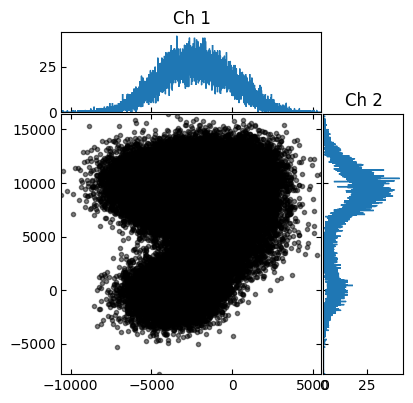

<Figure size 800x800 with 0 Axes>

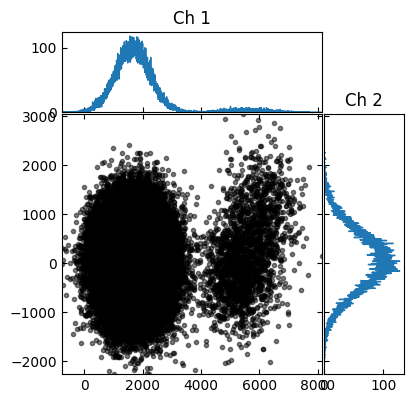

saved F


In [5]:
phase = 0
swap_amp = 1.23
pnp.pi_nopi_swap(
    q1,
    q2,
    general_vals_dict,
    copief=0.5,
    coswap=1,
    copige=1,
    num_steps=3,
    swap_freq=swap_freq,
    swap_time=swap_time,
    phase=phase,
    swap_amp=swap_amp,
)
wx.wx_set_and_amplitude_and_offset(
    amp=general_vals_dict["wx_amps"], offset=general_vals_dict["wx_offs"]
)
values = daq.run_daq_het_2q(
    q1, q2, num_patterns=num_steps, num_records_per_pattern=reps, verbose=True
)

# Retrieve raw IQ data from the acquired values
I1_raw = values.rec_readout_1[0][0 : reps * num_steps]
Q1_raw = values.rec_readout_1[1][0 : reps * num_steps]
I2_raw = values.rec_readout_2[0][0 : reps * num_steps]
Q2_raw = values.rec_readout_2[1][0 : reps * num_steps]

# Build a DataFrame from the IQ data for classification
IQ_df = pd.DataFrame({"I1": I1_raw, "Q1": Q1_raw, "I2": I2_raw, "Q2": Q2_raw})